In [57]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import textnets as tn
from textnets import Corpus
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# !python -m spacy download en_core_web_sm
#Warnigs 
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading csv file
dataset = pd.read_csv('AH_DICOM_CT_Stopwords.csv', encoding = 'utf-8',index_col='clase')
dataset

,filename,text_stopwords
clase,,
covid,8269611_AH_20/07/2016,tomografo multicorte realizo tomografia torax ...
covid,5358300_AH_31/07/2020,estudio angiotomografia torax tecnica tecnica ...
covid,5368095_AH_05/10/2020,estudio tac torax contrastado tecnica tomograf...
covid,5335153_AH_16/09/2020,estudio tac torax simple tecnica tomografo mul...
covid,5357533_AH_21/09/2020,estudio tac torax simple tecnica tomografo mul...
...,...,...
otros,sssvf_otros_95_ft_20181016_ct_110001639,marin ortega maria gertrudis servicio hu u.e d...
otros,sssvf_otros_96_ms_20200428_ct_110000BCA,buritica martinez daniel servicio servicio ext...
otros,sssvf_otros_97_mm_20200104_ct_1100001C9,pineda german servicio hr u.e unidad cuidado i...


In [147]:
dataset.iloc[0,:]

text_stopwords    tomografo multicorte realizo tomografia torax ...
Name: covid, dtype: object

In [3]:
dataset.drop(['filename'],axis=1,inplace=True)

In [123]:
data_s=dataset.sample(200)

d:\Python_ex\lib\site-packages\textnets\corpus.py:98: UserWarning: Language model 'en_core_web_sm' is not yet installed.
  warn(f"Language model '{self.lang}' is not yet installed.")


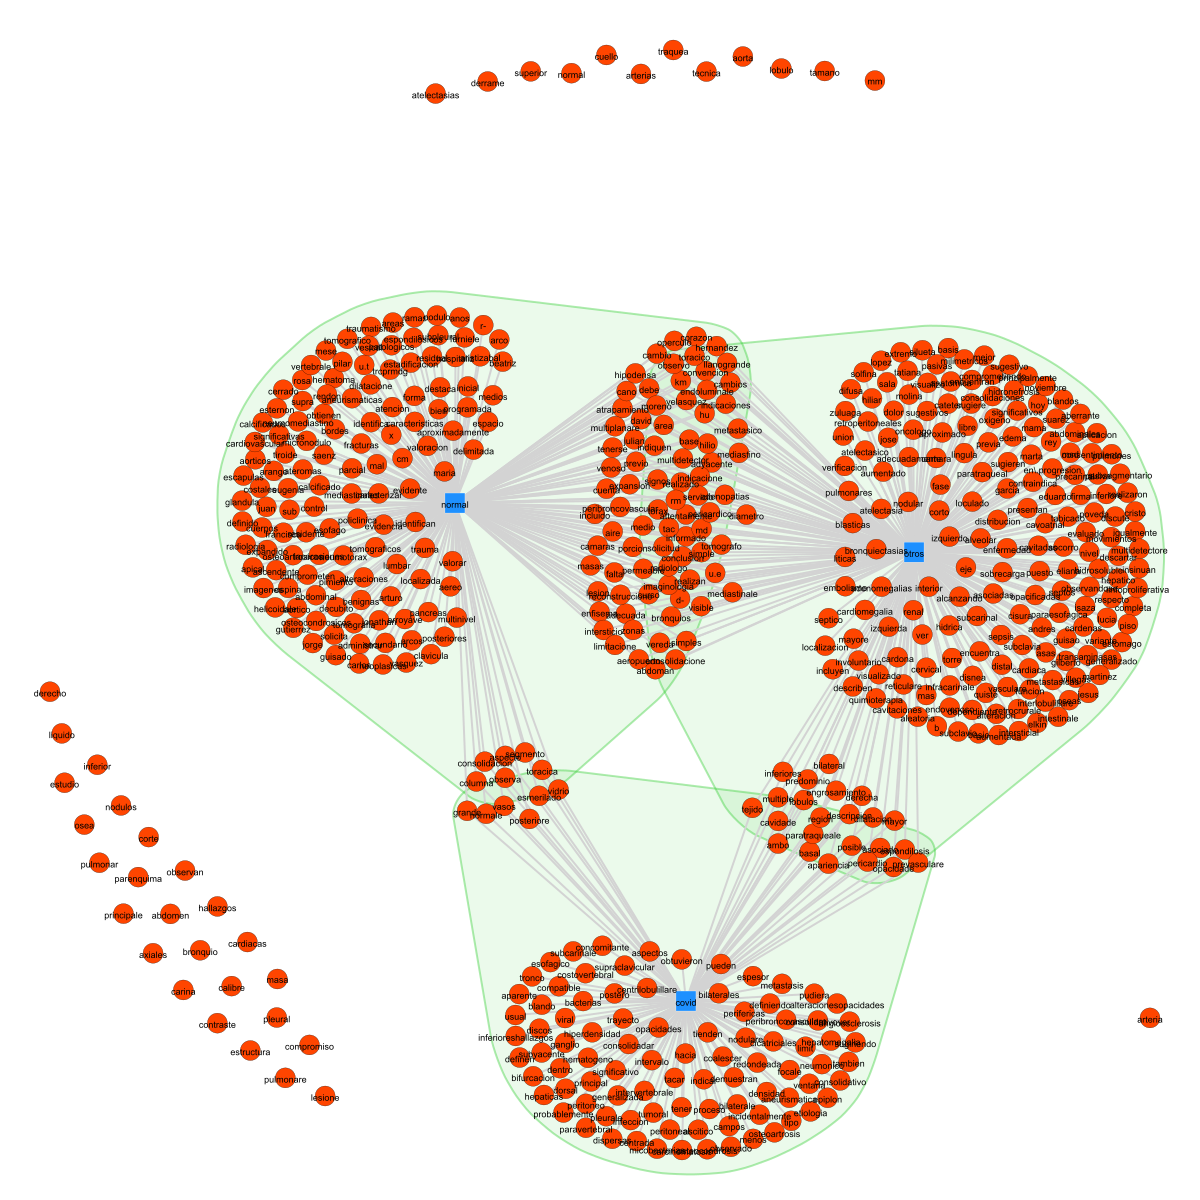

In [28]:
corpus = Corpus(data_s['text_stopwords'])
t = tn.Textnet(corpus.tokenized(), min_docs=1)
t.plot(label_nodes=True,
       show_clusters=True,
        bbox=(1200, 1200),
        )

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.85, max_features=10000)
word_count_vector = cv.fit_transform(data_s['text_stopwords'])
word_count_vector

<10x596 sparse matrix of type '<class 'numpy.int64'>'
	with 1093 stored elements in Compressed Sparse Row format>

In [126]:
# crear la transformación
vectorizer = CountVectorizer()
# tokenizar y construir el vocabulario
vectorizer.fit(data_s['text_stopwords'])
# resumen
# print(vectorizer.vocabulary_)
# codificador de documentos
vector = vectorizer.transform(data_s['text_stopwords'])
# resumir vector codificado
print(vector.shape)
# print(type(vector))
# print(vector.toarray())
# Generate a dataframe with the word counts
df_count = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())

(200, 2759)


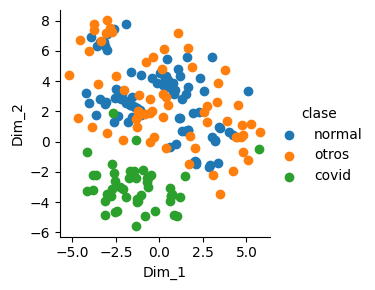

In [127]:
X=vector.toarray()
model = TSNE(n_components=2, random_state=0, perplexity=50)
np.set_printoptions(suppress=True)
tsne_data = model.fit_transform(X)
tsne_data = np.vstack((tsne_data.T, data_s.index)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "clase"))
sns.FacetGrid(tsne_df, hue="clase").map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_df=0.85, max_features=10000)
X = tfidfconverter.fit_transform(data_s['text_stopwords']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
# crear la transformación
vectorizer = TfidfVectorizer()
# tokenizar y construir vocabulario
vectorizer.fit(data_s['text_stopwords'])
# resumir
# print(vectorizer.vocabulary_)
# print(vectorizer.idf_)
# documento codificado
vector = vectorizer.transform(data_s['text_stopwords'])
# resumir vector codificado
print(vector.shape)
# print(vector.toarray())
#Getting a dataframe of the vecto
df_tfidf = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())

(200, 2759)


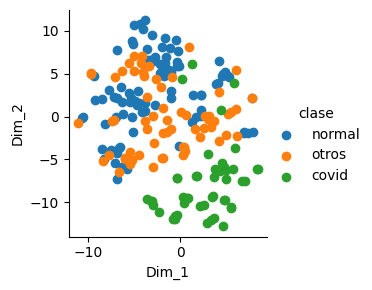

In [134]:
X=vector.toarray()
model = TSNE(n_components=2, random_state=0, perplexity=50)
np.set_printoptions(suppress=True)
tsne_data = model.fit_transform(X)
tsne_data = np.vstack((tsne_data.T, data_s.index)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "clase"))
sns.FacetGrid(tsne_df, hue="clase").map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [135]:
#HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(n_features=100)
X = vectorizer.fit_transform(data_s['text_stopwords'])
print(X.shape)
# print(X.toarray())
#Getting a dataframe of the vector
df_hash = pd.DataFrame(X.toarray())

(200, 100)


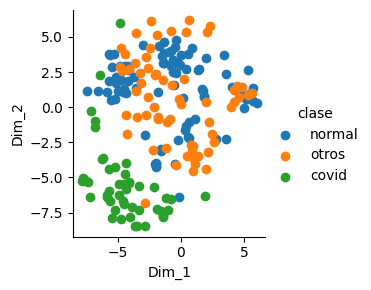

In [136]:
#Using Tsne for visualization of the data points X
model = TSNE(n_components=2, random_state=0, perplexity=50)
np.set_printoptions(suppress=True)
tsne_data = model.fit_transform(X)
tsne_data = np.vstack((tsne_data.T, data_s.index)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "clase"))
sns.FacetGrid(tsne_df, hue="clase").map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()


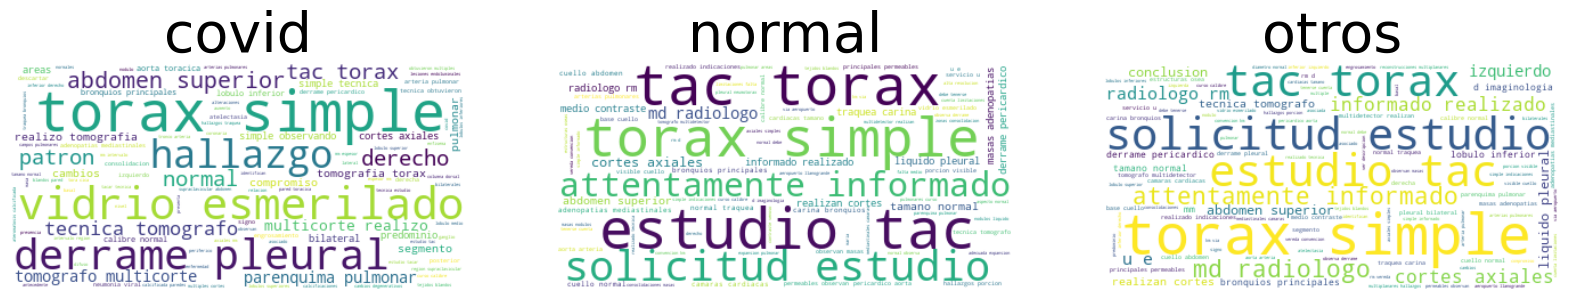

In [137]:
#generating a word cloud for every class
from wordcloud import WordCloud
#Concatenate a text for each class
text1 = " ".join(review for review in data_s[data_s.index == 'covid']['text_stopwords'])
text2 = " ".join(review for review in data_s[data_s.index == 'normal']['text_stopwords'])
text3 = " ".join(review for review in data_s[data_s.index == 'otros']['text_stopwords'])

#Create a word cloud for each text
wordcloud1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text1)
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text2)
wordcloud3 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text3)

#Plot the word cloud
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[0].set_title('covid', fontsize=40)
axes[0].axis("off")
axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].set_title('normal', fontsize=40)
axes[1].axis("off")
axes[2].imshow(wordcloud3, interpolation='bilinear')
axes[2].set_title('otros', fontsize=40)
axes[2].axis("off")
plt.show()

In [144]:
#Getting the most frequent words for each class
from collections import Counter
#Concatenate a text for each class
text1 = " ".join(review for review in data_s[data_s.index == 'covid']['text_stopwords'])
text2 = " ".join(review for review in data_s[data_s.index == 'normal']['text_stopwords'])
text3 = " ".join(review for review in data_s[data_s.index == 'otros']['text_stopwords'])
#Split the text into words
words1 = text1.split()
words2 = text2.split()
words3 = text3.split()
#Count the frequency of each word
count1 = Counter(words1)
count2 = Counter(words2)
count3 = Counter(words3)
#Get the most frequent words
most_occur1 = count1.most_common(10)
most_occur2 = count2.most_common(10)
most_occur3 = count3.most_common(10)
#Print the most frequent words
print(most_occur1)
print(most_occur2)
print(most_occur3)

#Occurancies to a dataframe for each class
df1 = pd.DataFrame(most_occur1, columns = ['Word' , 'Count'])
df2 = pd.DataFrame(most_occur2, columns = ['Word' , 'Count'])
df3 = pd.DataFrame(most_occur3, columns = ['Word' , 'Count'])
#Concatenate the dataframes
df_all = pd.concat([df1, df2, df3], axis=1)
#Multindex for the columns of the dataframe showing the class
df_all.columns = pd.MultiIndex.from_product([['covid', 'normal', 'otros'], ['Word', 'Count']])
df_all


[('pulmonar', 111), ('normal', 87), ('mm', 72), ('hallazgos', 71), ('derrame', 71), ('tecnica', 63), ('torax', 63), ('superior', 61), ('aorta', 61), ('simple', 54)]
[('normal', 273), ('informado', 190), ('masas', 167), ('estudio', 142), ('cuello', 137), ('hallazgos', 134), ('torax', 128), ('servicio', 114), ('pulmonar', 112), ('simple', 107)]
[('normal', 172), ('informado', 134), ('pulmonar', 105), ('simple', 97), ('torax', 96), ('pleural', 91), ('superior', 87), ('cuello', 86), ('estudio', 83), ('liquido', 81)]


covid           normal            otros      
        Word Count       Word Count       Word Count
0   pulmonar   111     normal   273     normal   172
1     normal    87  informado   190  informado   134
2         mm    72      masas   167   pulmonar   105
3  hallazgos    71    estudio   142     simple    97
4    derrame    71     cuello   137      torax    96
5    tecnica    63  hallazgos   134    pleural    91
6      torax    63      torax   128   superior    87
7   superior    61   servicio   114     cuello    86
8      aorta    61   pulmonar   112    estudio    83
9     simple    54     simple   107    liquido    81

In [145]:
#Using feature selection methods to select the most relevant features of each df

#Selecting the 10 most relevant features for each df
X = df_count.iloc[:,:]   #independent columns
y = data_s.index    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores_chi = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_chi.columns = ['Specs','Score']  #naming the dataframe columns
# print("chi_square")
# print(featureScores_chi.nlargest(10,'Score'))  #print 10 best features

#2nd Feature Selection Method using Mutual Information
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores_MI = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_MI.columns = ['Specs','Score']  #naming the dataframe columns
# print("mutual_info_classif")
# print(featureScores_MI.nlargest(10,'Score'))  #print 10 best features

#3rd Feature Selection Method using RFE (Recursive Feature Elimination)

model = LogisticRegression()
rfe = RFE(model,n_features_to_select=10)
fit = rfe.fit(X, y)
print ("Logistic regresion")
# print("Num Features: %d" % fit.n_features_)
#To get the names of the selected features
#Getting the names of the selected features where fit support is true
selected_features_log = []
for i in range(len(fit.support_)):
    if fit.support_[i] == True:
        selected_features_log.append(X.columns[i])
# print(selected_features_log)

# print(fit.n_features_)
# print(fit.estimator_)
# print(fit.score(X, y))

#4th Feature Selection Method using RFE (Recursive Feature Elimination) with random forest

model = RandomForestClassifier()
rfe = RFE(model,n_features_to_select=10)
fit = rfe.fit(X, y)
print ("Random Forest")
# print("Num Features: %d" % fit.n_features_)
#To get the names of the selected features
#Getting the names of the selected features where fit support is true
selected_features_rfe = []
for i in range(len(fit.support_)):
    if fit.support_[i] == True:
        selected_features_rfe.append(X.columns[i])
# print(selected_features_rfe)
# print(fit.n_features_)
# print(fit.estimator_)
# print(fit.score(X, y))

#Generating a dataframe with the selected features for each method
#and the class
df_chi= featureScores_chi.nlargest(10,'Score')['Specs'].to_frame().reset_index(drop=True)
df_MI= featureScores_MI.nlargest(10,'Score')['Specs'].to_frame().reset_index(drop=True)
df_rf= pd.DataFrame(selected_features_rfe).reset_index(drop=True)
df_log= pd.DataFrame(selected_features_log).reset_index(drop=True)
#Concatenating the dataframes into one
df_features= pd.concat([df_chi,df_MI,df_rf,df_log],axis=1)
df_features.columns = ['chi_square','mutual_info_classif','Random_Forest','Logistic_Regression']
df_features

Logistic regresion
Random Forest


,chi_square,mutual_info_classif,Random_Forest,Logistic_Regression
0,observando,servicio,bilateral,anormales
1,viral,informado,enfisema,attentamente
2,informado,radiologo,informado,bilateral
3,multicorte,conclusion,lobulo,informado
4,realizo,solicitud,masas,md
5,cantidad,realizado,pleural,multiples
6,bilateral,attentamente,radiologo,patologicos
7,tronco,indicaciones,realizado,policlinica
8,patron,md,servicio,servicio
9,cica,rm,solicitud,viral


In [146]:
#Using feature selection methods to select the most relevant features of each df

#Selecting the 10 most relevant features for each df
X = df_tfidf.iloc[:,:]   #independent columns
y = data_s.index    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores_chi = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_chi.columns = ['Specs','Score']  #naming the dataframe columns
# print("chi_square")
# print(featureScores_chi.nlargest(10,'Score'))  #print 10 best features

#2nd Feature Selection Method using Mutual Information
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores_MI = pd.concat([dfcolumns,dfscores],axis=1)
featureScores_MI.columns = ['Specs','Score']  #naming the dataframe columns
# print("mutual_info_classif")
# print(featureScores_MI.nlargest(10,'Score'))  #print 10 best features

#3rd Feature Selection Method using RFE (Recursive Feature Elimination)

model = LogisticRegression()
rfe = RFE(model,n_features_to_select=10)
fit = rfe.fit(X, y)
print ("Logistic regresion")
# print("Num Features: %d" % fit.n_features_)
#To get the names of the selected features
#Getting the names of the selected features where fit support is true
selected_features_log = []
for i in range(len(fit.support_)):
    if fit.support_[i] == True:
        selected_features_log.append(X.columns[i])
# print(selected_features_log)

# print(fit.n_features_)
# print(fit.estimator_)
# print(fit.score(X, y))

#4th Feature Selection Method using RFE (Recursive Feature Elimination) with random forest

model = RandomForestClassifier()
rfe = RFE(model,n_features_to_select=10)
fit = rfe.fit(X, y)
print ("Random Forest")
# print("Num Features: %d" % fit.n_features_)
#To get the names of the selected features
#Getting the names of the selected features where fit support is true
selected_features_rfe = []
for i in range(len(fit.support_)):
    if fit.support_[i] == True:
        selected_features_rfe.append(X.columns[i])
# print(selected_features_rfe)
# print(fit.n_features_)
# print(fit.estimator_)
# print(fit.score(X, y))

#Generating a dataframe with the selected features for each method
#and the class
df_chi= featureScores_chi.nlargest(10,'Score')['Specs'].to_frame().reset_index(drop=True)
df_MI= featureScores_MI.nlargest(10,'Score')['Specs'].to_frame().reset_index(drop=True)
df_rf= pd.DataFrame(selected_features_rfe).reset_index(drop=True)
df_log= pd.DataFrame(selected_features_log).reset_index(drop=True)
#Concatenating the dataframes into one
df_features= pd.concat([df_chi,df_MI,df_rf,df_log],axis=1)
df_features.columns = ['chi_square','mutual_info_classif','Random_Forest','Logistic_Regression']
df_features

Logistic regresion
Random Forest


,chi_square,mutual_info_classif,Random_Forest,Logistic_Regression
0,observando,servicio,bilateral,bilateral
1,viral,radiologo,estudio,cantidad
2,multicorte,informado,informado,cuello
3,cica,realizado,masas,informado
4,tora,solicitud,pleural,masas
5,realizo,conclusion,radiologo,multiples
6,espesor,md,realizado,normal
7,intervalo,attentamente,rm,observando
8,obtuvieron,indicaciones,servicio,servicio
9,covid,rm,solicitud,viral
